# Latar Belakang

Sebuah perusahaan yang bergerak pada bidang retail, sedang melakukan program promo besar-besaran dengan tujuan untuk meningkatkan total penjualan barang. Program promo, baik melalui campaign dan diskon telah dilakukan, namun tidak semua pelanggan merespon hal ini dengan baik.

# Pernyataan Masalah
Perusahaan ingin mengetahui pelanggan mana yang telah merespon program promo dan diskon dengan baik. Informasi ini akan membantu perusahaan dalam mengurangi biaya marketing, meningkatkan kualitas layanan serta membantu perencanaan program promo dan diskon yang lebih efektif, sehingga jumlah penjualan dapat meningkat.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pelanggan yang melakukan pembelian setelah mendapatkan program promo terakhir?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data pelanggan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Customer Personality Analysis adalah analisis terperinci tentang pelanggan ideal dari suatu perusahaan. Hal ini dapat membantu perusahaan untuk lebih memahami pelanggannya dan memudahkan mereka untuk melakukan perubahan produk sesuai dengan kebutuhan, perilaku, dan variabel khusus lainnya dari berbagai jenis pelanggan.

Terdapat 29 kolom dalam dataset, secara garis besar dapat dikelompokkan dalam 4 kategori. Yakni, kolom yang memuat data tentang **orang, produk, promosi dan tempat pelanggan membeli produk**. Berikut adalah penjelasan dari masing-masing kolom tersebut.

- Orang:<br>
    1. ID: Nomor unik / identitas pelanggan
    2. Year_Birth: Tahun lahir pelanggan
    3. Education: Tingkat pendidikan
    4. Marital_Status: Status perkawinan
    5. Income: Jumlah pendapatan per tahun
    6. Kidhome: Jumlah anak dalam satu rumah
    7. Teenhome: Jumlah anak remaja dalam satu rumah
    8. Dt_Customer: Tanggal pelanggan mendaftar
    9. Recency: Jumlah hari sejak pembelian terkahir
    10. Complain: 1 jika pelanggan pernah melakukan komplain pada 2 tahun terakhir, 0 lainnya/tidak

<br>

- Produk:<br>
    1. MntWines: Jumlah pengeluaran untuk Wine
    2. MntFruits: Jumlah pengeluaran untuk buah-buahan
    3. MntMeatProducts: Jumlah pengeluaran untuk daging
    4. MntFishProducts: Jumlah pengeluaran untuk ikan
    5. MntSweetProducts: Jumlah pengeluaran untuk produk manis (seperti: permen, coklat, cookies, dll.)
    6. MntGoldProds: Jumlah pengeluaran untuk produk emas<br>
        **Transaksi dalam 2 tahun terakhir**

<br>

- Promosi:<br>
    1. NumDealsPurchases: Jumlah pembelian yg dilakukan menggunakan diskon
    2. AcceptedCmp1: 1 jika pelanggan menerima penawaran pada campaign pertama, 0 lainnya
    3. AcceptedCmp2: 1 jika pelanggan menerima penawaran pada campaign kedua, 0 lainnya
    4. AcceptedCmp3: 1 jika pelanggan menerima penawaran pada campaign ketiga, 0 lainnya
    5. AcceptedCmp4: 1 jika pelanggan menerima penawaran pada campaign keempat, 0 lainnya
    6. AcceptedCmp5: 1 jika pelanggan menerima penawaran pada campaign kelima, 0 lainnya
    7. Response: 1 jika pelanggan menerima penawaran pada campaign terakhir, 0 lainnya

<br>

- Tempat:<br>
    1. NumWebPurchases: Jumlah pembelian dilakukan melalui website perusahaan
    2. NumCatalogPurchases: Jumlah pembelian menggunakan katalog
    3. NumStorePurchases: Jumlah pembelian langsung dilakukan di toko
    4. NumWebVisitsMonth: Jumlah kunjungan ke website pada bulan terakhir


Berikut adalah 5 baris teratas dan 5 baris terbawah dari dataset marketing_campaign:

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding & Cleaning

Data Understanding diperlukan untuk mengenali anomali-anomali yang terdapat dalam dataset. Setelah itu, proses Data Cleaning akan dilakukan untuk mengatasi anomali tersebut. Pengambilan keputusan untuk penanganan anomali akan didasarkan pada *domain knowledge* dan secara statistik.

In [3]:
# melihat jumlah kolom dan baris

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Berdasarkan informasi di atas dapat dilihat bahwa dataset terdiri atas 2240 baris dan 29 kolom

In [79]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalAcceptedCmp,TotalPurchases,Childrens,Spending
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.072768,0.064286,0.013393,0.009375,0.149107,53.194196,0.297768,14.862054,0.950446,605.798214
std,3246.662198,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.678381,7.677173,0.751803,602.249288
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,8.000000,0.000000,68.750000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,15.000000,1.000000,396.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,21.000000,1.000000,1045.500000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,4.000000,44.000000,3.000000,2525.000000


In [80]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,3,2,663
top,Graduate,InRelationship,31-08-2012
freq,1330,1444,12


In [4]:
# melihat jumlah unique values pada tiap kolom

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
df[['Z_CostContact','Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


Terdapat 2 variabel, yakni (Z_CostContact, Z_Revenue) yang tidak akan digunakan dalam analisis. Hal ini didasarkan pada:
- Kolom tersebut memiliki 1 value (single value)
- Dari segi statistik, kolom dengan single value tidak akan dapat dilakukan perhitungan nilai tengah (median) maupun rata-rata (mean).

Sehingga akan dilakukan penghapusan pada 2 kolom ini.

In [6]:
df.drop(['Z_CostContact' ,'Z_Revenue'] , axis = 1 , inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### Missing Value

In [7]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
MntGoldProds            0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntSweetProducts        0
Year_Birth              0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

Dari keseluruhan dataset, hanya kolom 'Income' yang memiliki missing value. Pada baris yang memiliki missing value akan dilakukan pengisian data menggunakan nilai tengah (median).

In [8]:
# mengisi missing value dengan median
df['Income'].fillna(value=df['Income'].median(), inplace=True)

In [9]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### Fitur Tambahan

Bertujuan untuk memudahkan proses analisis, maka perlu dibuat beberapa fitur tambahan yang terdiri dari:
- Age : dataset hanya menampilkan tahun lahir pelanggan, fitur 'Age' akan memudahkan membaca usia pelanggan
- TotalCampAcc : berisi jumlah campaign yg diterima oleh pelanggan
- TotalPurchases : total pembelian yg dilakukan pelanggan
- Childern : kolom 'Kidhome' dan 'Teenhome' merujuk pada jumlah anak yg dimiliki pelanggan, maka kolom ini dapat disederhanakan
- Marital_Status : dapat disederhanakan dalam 2 kategori, InRelationship dan Single
- Spending : merupakan penjumlahan dari semua kategori produk yang dibeli
- Educatio : dapat disederhanakan menjadi 3 kategori, Under Graduate, Graduate, dan Post Graduate

In [10]:
df['Age'] = 2022 - df['Year_Birth']

df['TotalAcceptedCmp'] = df[['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',]].sum(axis=1)


df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1) #the total number of pruchase 


df['Childrens'] = df[['Kidhome' , 'Teenhome']].sum(axis=1) #number of children that customer has

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'InRelationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

df['Spending']=df[[ 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].aggregate([sum] ,axis = 1) #amount of money the customer pay it

df['Education'] = df['Education'].replace(['2n Cycle','Graduation'],'Graduate') #simplifing education
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')
df['Education'] = df['Education'].replace(['PhD','Master'], 'Post Graduate')

In [11]:
# menghapus kolom Year_Birth karena sudah digantikan kolom Age
df.drop(['Year_Birth'], axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalAcceptedCmp,TotalPurchases,Childrens,Spending
0,5524,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,1,65,0,25,0,1617
1,2174,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,68,0,6,2,27
2,4141,Graduate,InRelationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,57,0,21,0,776
3,6182,Graduate,InRelationship,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,38,0,8,1,53
4,5324,Post Graduate,InRelationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,41,0,19,1,422


## Data Analysis

Setelah melakukan Data Cleaning, sekarang kita dapat memulai Data Analysis untuk menjawab pertanyaan **Bagaimana karakteristik pelanggan yang melakukan pembelian setelah mendapatkan program promo terakhir?**

Analisis akan dilakukan dengan membandingkan data pelanggan yang menerima campaign terakhir (Response=1) dan tidak menerima campaign terakhir (Response=0) berdasarkan fitur yang tersedia. karena dari 2240 data yang kita miliki, hanya 334 data berasal dari pelanggan yang menerima campaign terakhir, kita perlu berhati-hati dalam membandingkan data pelanggan berdasarkan Response, pembandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [12]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

### Berdasarkan `Age` dan `Eduaction`.

Pertama kita akan bagaimana pengaruh usia dan tingkat pendidikan pelanggan terhadap campaign terakhir yang diterima. Kolom Age dan Education akan dianalisa untuk menjawab pertanyaan:

1. Usia berapa yang paling banyak menerima campaign terakhir?
1. Tingkat pendidikan apa yang paling banyak menerima campaign terakhir?

In [38]:
# 10 kelompok usia dengan jumlah penolakan penawaran campaign terkahir terbanyak (Response=0)

df_age=pd.crosstab(df['Age'],df['Response'])
df_age['Total']=df_age.sum(axis=1)
df_age.sort_values('Total',ascending=False).head(10)

Response,0,1,Total
Age,,,
46,81,8,89
51,73,14,87
47,72,11,83
50,65,14,79
52,61,16,77
44,74,3,77
57,68,6,74
49,63,11,74
53,61,10,71


In [47]:
# 10 kelompok usia dengan jumlah penerimaan penawaran pada campaign terkahir terbanyak (Response=1)

df_age.sort_values(1,ascending=False).head(10)

Response,0,1,Total
Age,,,
52,61,16,77
50,65,14,79
51,73,14,87
40,32,13,45
38,27,11,38
49,63,11,74
48,58,11,69
47,72,11,83
45,41,11,52


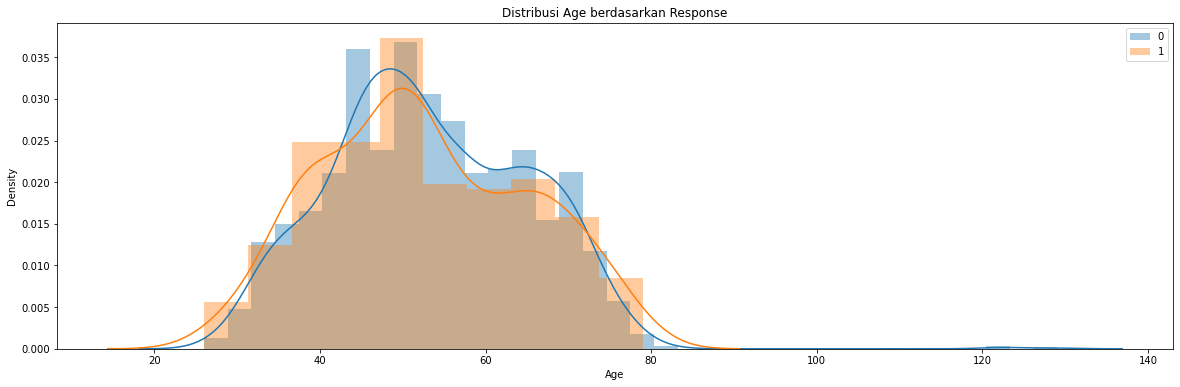

In [54]:
plt.figure(figsize=(20,6))
sns.distplot(df[df['Response']==0]['Age'],label=0)
sns.distplot(df[df['Response']==1]['Age'],label=1)
plt.title('Distribusi Age berdasarkan Response')
plt.legend()
plt.show()

Berdasarkan hasil tabulasi silang dan grafik di atas, dapat dilihat bahwa pelanggan yang berusia antara 40-60 tahun mendapatkan campaign terakhir. Sementara kelompok usia 50-55 tahun merupakan kelompok terbanyak yang menerima penawaran pada campaign tersebut.

In [48]:
# penerimaan tawaran pada campaign terakhir berdasarkan tingkat pendidikan

df_edu=pd.crosstab(df['Education'],df['Response'])
df_edu['Total']=df_edu.sum(axis=1)
df_edu.sort_values(0,ascending=False).head(10)

Response,0,1,Total
Education,,,
Graduate,1156,174,1330
Post Graduate,698,158,856
Under Graduate,52,2,54


<AxesSubplot:xlabel='Education'>

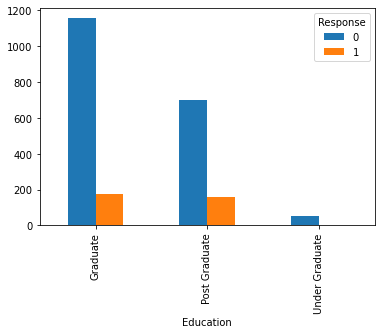

In [76]:
df_edu.sort_values(0,ascending=False).head(10).drop(columns='Total').plot(kind='bar')

Bedasarkan analisa di atas, dapat dilihat bahwa pelanggan yang mendapatkan campaign terakhir dan menerima penawaran terbanyak memiliki tingkat pendidikan Graduate.

### Berdasarakan `TotalAcceptedCmp'

Sekarang kita akan melihat bagaimana pengaruh variabel 'TotalAcceptedCmp' atau jumlah keseluruhan campaign yang diterima oleh pelanggan terhadap penerimaan penawaran pada campaign terakhir.

In [110]:
df[['TotalAcceptedCmp','Response']].sort_values(by='TotalAcceptedCmp',ascending=False)

,TotalAcceptedCmp,Response
252,4,1
430,4,1
1087,4,1
417,4,0
824,4,1
...,...,...
810,0,0
809,0,0
807,0,0
806,0,0


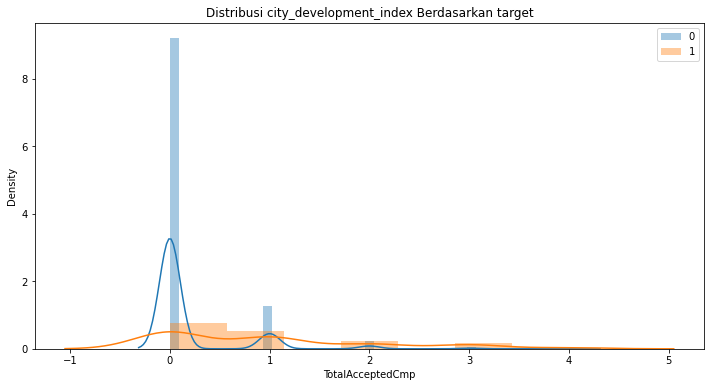

In [112]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Response']==0]['TotalAcceptedCmp'],label=0)
sns.distplot(df[df['Response']==1]['TotalAcceptedCmp'],label=1)
plt.title('Distribusi TotalAcceptedCmp berdasarkan Response')
plt.legend()
plt.show()

Analisa diatas menunjukkan bahwa, semakin sering pelanggan menerima campaign, maka semakin tinggi kemungkinan pelanggan untuk menerima penawaran dalam campaign terakhir.

In [127]:
df[['Spending','Response']].sort_values(by='Spending',ascending=False)

,Spending,Response
1572,2525,1
1179,2525,0
1492,2524,1
987,2486,1
1052,2440,0
...,...,...
2132,8,0
2129,8,0
981,6,0
655,6,0


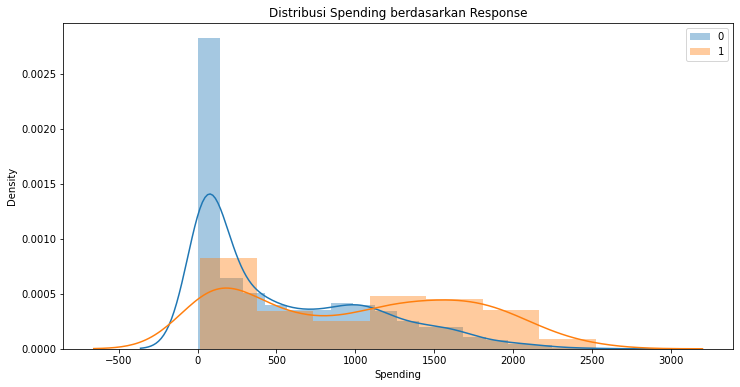

In [144]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Response']==0]['Spending'],label=0)
sns.distplot(df[df['Response']==1]['Spending'],label=1)
plt.title('Distribusi Spending berdasarkan Response')
plt.legend()
plt.show()

Graifk distribusi di atas menunjukkan bahwa semakin apabila pelanggan menerima campaign terakhir, maka meningkatkan kemungkinan pelanggan untuk Spending lebih besar.

In [142]:
# Marital_Status vs Response

df_marital=pd.crosstab(df['Marital_Status'],df['Response'])
df_marital['Total']=df_marital.sum(axis=1)
df_marital.sort_values(0,ascending=False).head(10)

Response,0,1,Total
Marital_Status,,,
InRelationship,1286,158,1444
Single,620,176,796


In [140]:
fig = px.histogram (df, x = "Marital_Status",  facet_row = "Response",  template = 'plotly_dark')
fig.show ()

Analisis Marital_Status vs Response, menunjukkan bahwa pelanggan yang menerima penawaran terakhir memiliki status perkawinan Single.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan mengenai pelanggan yang menerima penawaran pada campaign terakhir:
* Dari 2240 data yang kita miliki, hanya 334 data pelanggan yang menerima penawaran dari campaign terakhir.
* Pelanggan yang menerima penawaran pada campaign terakhir berusuia 50 dan 52 tahun.
* Mayoritas pelanggan yang menerima penawaran adalah yg memiliki tingkat pendidikan Graduate.
* Semakin sering pelanggan menerima campaign, maka semakin besar peluang pelanggan untuk menerima penawaran.
* Pelanggan yang menerima penawaran, meningkatkan peluang untuk Spending lebih besar.
* Mayoritas pelanggan yang menerima penawaran adalah berstatus Single.


**Rekomendasi**
1. Program promosi (campaign) dapat difokuskan pada kelompok usia antara 50-60 tahun.
2. Mengutamakan pelanggan dengan tingkat pendidikan Graduate.
3. Campaign dapat dilakukan dengan frekuensi yang lebih sering. Hal ini untuk memperbesar kemungkinan tawaran diterima pelanggan.
4. Memberikan program promo lainnya pada pelanggan yang telah menerima penawaran, hal ini bertujuan agar total Spending pelanggan pada kelompok ini menjadi lebih besar.
5. Pelanggan dengan status Singel memiliki kemungkinan lebih besar dalam menerima penawaran. Campaign dapat difokuskan pada kelompok ini.